# 总结  
## 1、整体情况
总计统计了将近两个月的新注册用户情况，总计有311万的新增用户，但7日日均游玩32分钟以上的用户仅有19万，即2个月中真正的新增用户数为19万。  
而这日均游玩时间少于32分钟的292万名玩家总计贡献了66269.54元的收入。日均游玩32分钟以上的19万用户贡献了1713957.16元的收入。  
且付费玩家的平均游玩时长比无氪玩家平均游玩时长长2个小时
#### 若以游玩时间大于0来计算活跃用户
整体的AU为3056673  
APA为60987  
ARPU为0.58元  
ARPPU为29.19元  
PUR为1.96%  
## 2、游戏内情况  
在游戏中可以发现，要塞等级越高，用户付费率也越高  
大部分在0和10-13等级就充值了首充。越往后玩家单次充值的金额越高，充值人群集中分布在9-20级之间。  
通过K-Means将玩家分为了三类  
可以看出1类玩家消耗加速类、资源和士兵数量是最多的，2类次之，3类最后。所以基本上可以判定1类玩家是游戏的主力玩家。  
从pvp角度来看，1类玩家的胜率是最低的，3类玩家的胜率最高。  
从资源的消耗情况来看治疗的加速和魔法、象牙的消耗是最低的  
## 3、建议（因为没有玩过该游戏，所以提出些表象建议）  
### 收入角度  
需要延长日均游玩32分钟以下的玩家游戏时长或分析这部分玩家游戏时长为什么那么少，以增加LTV  
### 游戏内角度  
需要增加治疗、魔法、象牙这三类资源的消耗，而原因需要进一步分析

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
X_test = pd.read_csv('tap_fun_test.csv')
X_train = pd.read_csv('tap_fun_train.csv')
data = pd.concat([X_test,X_train],ignore_index=True)

In [3]:
missing = data.isnull().sum()

In [4]:
missing.sort_values(ascending=False)

prediction_pay_price                   828934
sr_cavalry_tier_4_level                     0
sr_rss_b_gather_level                       0
sr_rss_a_gather_level                       0
sr_rss_d_prod_level                         0
                                        ...  
treatment_acceleration_reduce_value         0
treatment_acceleraion_add_value             0
training_acceleration_reduce_value          0
training_acceleration_add_value             0
sr_shaman_tier_2_level                      0
Length: 109, dtype: int64

In [5]:
data_1 = data.drop('prediction_pay_price',axis=1)

In [6]:
len(data_1)

3116941

In [7]:
len(data_1.drop_duplicates('user_id'))

3116941

In [8]:
data_1.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count
0,14933,2018-03-08 20:27:57,166415.0,138362.0,0.0,0.0,0.0,0.0,258522.0,90142.0,...,0,0,0,0,1,1,1,8.000000,0.0,0
1,14934,2018-03-08 20:29:42,10000.0,600.0,0.0,0.0,0.0,0.0,10000.0,400.0,...,0,0,0,0,0,0,0,0.166667,0.0,0
2,14935,2018-03-08 20:30:13,10000.0,3700.0,0.0,0.0,0.0,0.0,10000.0,2000.0,...,0,0,0,0,0,0,0,17.000000,0.0,0
3,14936,2018-03-08 20:31:41,210000.0,0.0,200000.0,0.0,200000.0,0.0,610000.0,0.0,...,0,0,0,0,0,0,0,1.666667,0.0,0
4,14937,2018-03-08 20:32:07,11500.0,3700.0,0.0,0.0,0.0,0.0,11000.0,2000.0,...,0,0,0,0,0,0,0,0.333333,0.0,0


In [9]:
data_1['register_time'] = pd.to_datetime(data_1['register_time']).dt.date

#### 每日新增用户

In [10]:
day_register = data_1.groupby('register_time',as_index=False)['user_id'].count()

In [11]:
day_register.head()

,register_time,user_id
0,2018-01-26,70250
1,2018-01-27,70417
2,2018-01-28,79227
3,2018-01-29,63803
4,2018-01-30,50201


In [12]:
np.mean(day_register['user_id'])

55659.66071428572

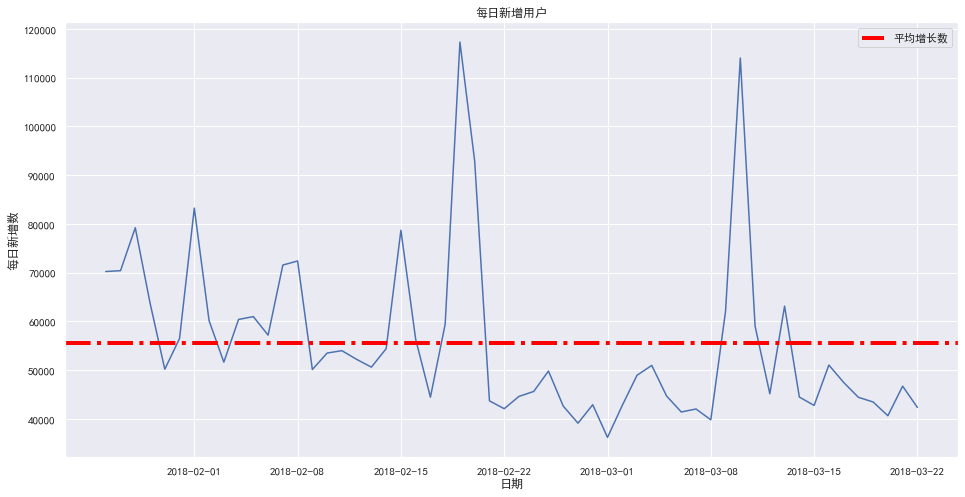

In [13]:
plt.figure(figsize=(16,8))
plt.plot(day_register['register_time'],day_register['user_id'])
plt.axhline(y=np.mean(day_register['user_id']),color='red',linestyle='-.',linewidth=4,label='平均增长数')

plt.legend()
plt.title('每日新增用户')
plt.ylabel('每日新增数')
plt.xlabel('日期')
plt.show()

#### 平均在线时长

In [102]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType

avg_time = (Bar(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
            .add_xaxis(['平均在线时长','氪金玩家在线时长','无氪玩家在线时长'])
            .add_yaxis('平均在线时长/分钟',[round(data_1['avg_online_minutes'].mean(),2),
                round(data_1.query('pay_count>0')['avg_online_minutes'].mean(),2),
                round(data_1.query('pay_count==0')['avg_online_minutes'].mean(),2)])
            .set_global_opts(title_opts=opts.TitleOpts(title="平均在线时长")))

avg_time.render_notebook()

[![qe1ua8.png](https://s1.ax1x.com/2022/03/20/qe1ua8.png)](https://imgtu.com/i/qe1ua8)

#### 常见指标

In [15]:
AU = data_1.query('avg_online_minutes>0')
print(len(AU))

3056673


In [16]:
APA = data_1.query('pay_count>0 and avg_online_minutes>0')
print(len(APA))

60987


In [17]:
ARPU = data_1['pay_price'].sum()/len(AU)
print(ARPU)

0.5824066558640721


In [18]:
ARPPU = data_1.query('pay_count>0')['pay_price'].sum()/len(APA)
print(ARPPU)

29.190265138472135


In [19]:
PUR = len(APA)/len(AU)
print('%.2f%%' %(PUR*100))

2.00%


#### 有意义的活跃用户定义

In [20]:
data_1.query('pay_count>0')[['avg_online_minutes']].describe()

,avg_online_minutes
count,60988.000000
mean,138.804781
std,148.911849
min,0.000000
25%,32.166667
50%,87.666667
75%,193.500000
max,1674.666667


当7日平均游玩时长大于32.17分钟的用户，才能算作该游戏的正常活跃用户

In [21]:
data_t = data_1.query('avg_online_minutes<32.166667')

In [22]:
data_t['pay_price'].sum()

66269.53999999998

In [23]:
data_2 = data_1.query('avg_online_minutes>=32.166667')

In [24]:
data_2['pay_price'].sum()

1713957.1599999997

In [25]:
len(data_2)

196880

In [26]:
len(data_2)/len(data_1)*100

6.3164493649382525

In [27]:
len(data_2.query('pay_count>0'))/len(data_2)

0.23265948801300285

当7日平均游玩时长大于274.17分钟时，付费率达到了23.27%

In [28]:
data_2['flag'] = data_2['pay_count'].apply(lambda x: 1 if x>0 else 0)

C:\Users\user\AppData\Local\Temp/ipykernel_1484/4011362544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['flag'] = data_2['pay_count'].apply(lambda x: 1 if x>0 else 0)


In [29]:
data_2['flag2'] = 1

C:\Users\user\AppData\Local\Temp/ipykernel_1484/2821750189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['flag2'] = 1


In [30]:
bd = data_2.groupby('bd_stronghold_level',as_index=False)[['flag2','flag']].sum()

In [31]:
bd['flag3'] = bd['flag2'] - bd['flag']

In [32]:
bd['rate'] = bd['flag']/bd['flag2']

In [101]:
(Bar()
    .add_xaxis(bd['bd_stronghold_level'].values.tolist())
    .add_yaxis("氪金玩家", bd['flag'].values.tolist(), stack="stack1")
    .add_yaxis("无氪玩家", bd['flag3'].values.tolist(), stack="stack1")
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="要塞等级付费玩家占比"))
    .render_notebook()
)

[![qe1nVf.png](https://s1.ax1x.com/2022/03/20/qe1nVf.png)](https://imgtu.com/i/qe1nVf)

In [103]:
(Bar()
    .add_xaxis(bd['bd_stronghold_level'].values.tolist())
    .add_yaxis("付费率", bd['rate'].values.tolist())
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="等级付费转化率"))
    .render_notebook()
)

[![qe1Zrt.png](https://s1.ax1x.com/2022/03/20/qe1Zrt.png)](https://imgtu.com/i/qe1Zrt)

In [35]:
bd2 = data_2.groupby('bd_stronghold_level',as_index=False)[['pay_price','pay_count']].sum()

In [36]:
bd2['pay_price_times'] = bd2['pay_price']/bd2['pay_count']

In [104]:
(Bar()
    .add_xaxis(bd2['bd_stronghold_level'].values.tolist())
    .add_yaxis("付费金额", bd2['pay_price'].values.tolist())
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="等级付费金额"))
    .render_notebook()
)

[![qe1eqP.png](https://s1.ax1x.com/2022/03/20/qe1eqP.png)](https://imgtu.com/i/qe1eqP)

In [105]:
(Bar()
    .add_xaxis(bd2['bd_stronghold_level'].values.tolist())
    .add_yaxis("平均单次付费金额", bd2['pay_price_times'].values.tolist())
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="等级平均单次付费金额"))
    .render_notebook()
)

[![qe1VKI.png](https://s1.ax1x.com/2022/03/20/qe1VKI.png)](https://imgtu.com/i/qe1VKI)

基本可以判定，0-13级的付费主要集中在首充上，大部分在0、10-13等级就充值了首充。越往后玩家单次充值的金额越高，充值人群集中分布在9-20级之间。

#### K-Means玩家分层

In [39]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

运算速度问题 5000条做测试.sample(n=100000).

In [40]:
data_sam = data_2.sample(n=10000).reset_index(drop=True)

In [41]:
X=data_sam[['pay_price', 'pvp_win_count']]
X= preprocessing.scale(X)

In [42]:
import random
random.seed(5)
distortions = []
K = range(1,9)
for i in K:
    kmeanModel = KMeans(n_clusters= i, init='k-means++', n_init=10, max_iter= 300).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

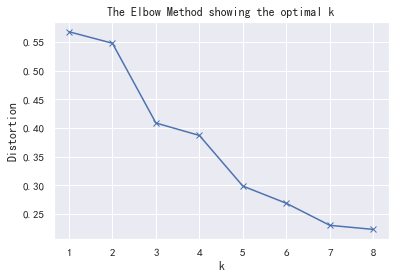

In [43]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [82]:
clf= KMeans(n_clusters= 3, init='k-means++', n_init=10, max_iter= 1000)
clf.fit(X)
prediction= clf.predict(X)
result= pd.concat([data_sam, pd.DataFrame(prediction)], axis=1)
result.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,flag,flag2,0
0,1569837,2018-02-23,37546008.0,36641131.0,28931664.0,27415706.0,16989982.0,11749706.0,51693448.0,37069249.0,...,12,70,70,61,212.166667,151.87,13,1,1,0
1,1849458,2018-02-05,10931730.0,8757375.0,5021093.0,2614032.0,2942000.0,0.0,19323040.0,11137537.0,...,18,31,31,28,204.166667,9.95,5,1,1,0
2,398522,2018-03-10,2352693.0,2499215.0,60000.0,0.0,3000.0,0.0,3186344.0,2461932.0,...,9,11,11,10,52.500000,0.00,0,0,1,0
3,1285370,2018-03-06,16892600.0,12576834.0,14253589.0,5526324.0,4265000.0,49152.0,22626417.0,12265084.0,...,3,140,140,138,185.333333,79.89,11,1,1,0
4,1503943,2018-02-02,13205029.0,11048228.0,6228494.0,4849688.0,2145360.0,479076.0,18118390.0,11793053.0,...,33,136,136,128,492.666667,0.00,0,0,1,0


In [83]:
te = result.groupby([0]).sum()

In [84]:
te[['pay_price','pay_count']].sort_values('pay_price')

,pay_price,pay_count
0,,
2,14146.61,239
1,19139.29,1171
0,46661.18,7182


In [85]:
result['活跃用户分类'] = result[0].apply(lambda x: '1类用户' if x==0 else ('2类用户' if x==1 else '3类用户'))

In [106]:
te2 = result.groupby(['活跃用户分类'],as_index=False)[['general_acceleration_reduce_value'
                                  ,'building_acceleration_add_value'
                                  ,'reaserch_acceleration_reduce_value'
                                 ,'training_acceleration_reduce_value'
                                 ,'treatment_acceleration_reduce_value']].sum()

In [107]:
te2

,活跃用户分类,general_acceleration_reduce_value,building_acceleration_add_value,reaserch_acceleration_reduce_value,training_acceleration_reduce_value,treatment_acceleration_reduce_value
0,1类用户,20083241,15643763,9258276,6823151,43049
1,2类用户,4744491,2484667,2175040,2227443,13356
2,3类用户,1576645,402142,654109,1026779,4100


In [108]:
te2_2 = te2.T.drop('活跃用户分类',axis=0)

In [109]:
(Bar()
    .add_xaxis(['通用','建筑','科研','训练','治疗'])
    .add_yaxis("1类用户", te2_2[0].values.tolist())
    .add_yaxis("2类用户", te2_2[1].values.tolist())
    .add_yaxis("3类用户", te2_2[2].values.tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="加速消耗情况")
    )
    .render_notebook()
)

[![qe1KIS.png](https://s1.ax1x.com/2022/03/20/qe1KIS.png)](https://imgtu.com/i/qe1KIS)

In [110]:
te3 = result.groupby(['活跃用户分类'],as_index=False)[['pvp_battle_count','pvp_lanch_count'
                                                 ,'pvp_win_count','pve_battle_count'
                                                 ,'pve_lanch_count','pve_win_count']].sum()

In [111]:
te3['PVP胜率'] = te3['pvp_win_count']/te3['pvp_battle_count']
te3['PVE胜率'] = te3['pve_win_count']/te3['pve_battle_count']

In [112]:
te3[['活跃用户分类','PVP胜率','PVE胜率']]

,活跃用户分类,PVP胜率,PVE胜率
0,1类用户,0.533650,0.904607
1,2类用户,0.851498,0.926897
2,3类用户,0.904639,0.879147


结论：氪金是因为菜亦或者获取更多的资源。同时 氪金所消耗的加速资源也是最多的。

In [113]:
te4 = result.groupby(['活跃用户分类'],as_index=False)[['wood_reduce_value'
                                  ,'stone_reduce_value'
                                  ,'ivory_reduce_value'
                                 ,'meat_reduce_value'
                                 ,'magic_reduce_value']].sum()

In [114]:
te4

,活跃用户分类,wood_reduce_value,stone_reduce_value,ivory_reduce_value,meat_reduce_value,magic_reduce_value
0,1类用户,3.979437e+10,1.554611e+10,2.639009e+09,3.932115e+10,5.305240e+09
1,2类用户,6.528738e+09,4.627747e+09,1.788002e+09,5.916157e+09,7.513162e+08
2,3类用户,2.316694e+09,2.238678e+09,1.035997e+09,2.036731e+09,2.947900e+08


In [115]:
te4_2 = te4.T.drop('活跃用户分类',axis=0)

In [116]:
(Bar()
    .add_xaxis(['木头','石头','象牙','肉','魔法'])
    .add_yaxis("1类用户", te4_2[0].values.tolist())
    .add_yaxis("2类用户", te4_2[1].values.tolist())
    .add_yaxis("3类用户", te4_2[2].values.tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="资源消耗情况")
    )
    .render_notebook()
)

[![qe1QPg.png](https://s1.ax1x.com/2022/03/20/qe1QPg.png)](https://imgtu.com/i/qe1QPg)

In [117]:
te5 = result.groupby(['活跃用户分类'],as_index=False)[['infantry_reduce_value'
                                  ,'cavalry_reduce_value'
                                  ,'shaman_reduce_value']].sum()

In [118]:
te5

,活跃用户分类,infantry_reduce_value,cavalry_reduce_value,shaman_reduce_value
0,1类用户,25816781,22971503,20386532
1,2类用户,3518484,3041487,2886922
2,3类用户,148040,143813,517445


In [119]:
te5_2 = te5.T.drop('活跃用户分类',axis=0)

In [120]:
(Bar()
    .add_xaxis(['勇士','驯兽师','萨满'])
    .add_yaxis("1类用户", te4_2[0].values.tolist())
    .add_yaxis("2类用户", te4_2[1].values.tolist())
    .add_yaxis("3类用户", te4_2[2].values.tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="士兵损失情况")
    )
    .render_notebook()
)

[![qe1lGQ.png](https://s1.ax1x.com/2022/03/20/qe1lGQ.png)](https://imgtu.com/i/qe1lGQ)